## Logistic Regression  - Also known as Generalized Linear Model


#### What is Logistic Regression?
- Logistic Regression model (or logit model) is a statistical model that is usually taken to apply to a binary dependent variable
- Logistic Regression predicts the probability of an outcome that can only have two values
- The prediction is based on the use of one or several predictors
- The predictors can be numerical, categorical or a mix of both

#### The Goal
"Help solve a business problem by predicting Telco Customer Churn"

Customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers. Here we focus on building a logistic regression model to predict customer behaviour to retain customers. In return this will help the business to develop focused customer retention plan/strategy.

Telephone and Internet service providers, insurance firms, and other service companies, often use customer churn analysis as one of their key business metrics, since the cost of retention of an existing customer is far less than acquiring a new one.

Service providers usually make a distinction between voluntary churn and involuntary churn. Voluntary churn might occur due to a decision made by the customer to switch to another service provider, involuntary churn might occur due to circumstances such as a customer relocation, death, etc. In most situations, involuntary churn customers are excluded from the analytical models. Analysts tend to only concentrate on voluntary churn, because it mainly focuses on company-customer relationship.

#### About the "Telco Customer Churn" dataset

The dataset contains data for 3066 entries. Each row in this dataset represents a customer, each column represents a customer attribute.
 
#### Independent Variables
    1.CustomerID - Unique Customer Identifier (Customer account information)
    2.Gender - Male=1/Female=0
    3.Partner - yes=1/no=0
    4.Dependents - yes=1/no=0 - Dependents could be children, parents, grandparents, etc.
    5.Tenure - how long they’ve been a customer	
    6.Contract - Contract type – month-to-month/One year/Two year
    7.PaymentMethod – Direct debit / Credit card
    8.MonthlyCharges - Indicates the customer’s current total monthly charge for all their services from the company.
    9.TotalCharges - Indicates the customer’s year to date total charges, calculated to the end of the month
 
#### Dependent Variable
    10.Churn – yes=1/no=0 - Customers who left within the last month


#### Downlaod and Install Python Libraries

In [210]:
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install scipy
#!pip install seaborn
#!pip install matplotlib

#### Import Python Libraries

In [211]:
# Importing some common libraries that’s needed for all data science related projects
import numpy as np
import pandas as pd
import math
import scipy


# Importing different modules from the sklearn library to build and evaluate the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, auc


# Importing matplotlib and seaborn libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Switching off unnecessary warning messages 
import warnings
warnings.filterwarnings('ignore')





#### Process map
Below illustrates a 12-step process used during this lab.

    1.	Import Data
    2.	Data Quality Checks
    3.	Data Cleansing
    4.	Exploratory Analysis using Distributions
    5.	Visualisations
    6.	Model: Pre-processing
    7.	Model: Train/Test Split 
    8.	Model: Build (Train dataset)
    9.	Model: Evaluation (Train dataset)
    10.	Model: Evaluation (Test dataset)
    11.	Model: Predictions
    12.	Model: Save Predictions

#### 1. Import Data

In [212]:
# Reading data from a Excel file and saving that data into a dataframe called "df"

df = pd.read_excel("Telco Customer Churn - Training Dataset.xlsx", sheet_name="Telco Customer Churn")
df

,CustomerID,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0280-XJGEX,Male,No,No,49,Month-to-month,Direct debit,103.70,5036.30,Yes
1,6865-JZNKO,Female,No,No,30,Month-to-month,Direct debit,55.30,1530.60,No
2,7310-EGVHZ,Male,No,No,1,Month-to-month,Direct debit,20.20,20.20,No
3,3413-BMNZE,Male,No,No,1,Month-to-month,Direct debit,45.25,45.25,No
4,8168-UQWWF,Female,No,No,11,Month-to-month,Direct debit,97.85,1105.40,Yes
...,...,...,...,...,...,...,...,...,...,...
3061,4616-ULAOA,Female,Yes,Yes,65,Two year,Credit card,110.80,7245.90,No
3062,2314-TNDJQ,Female,Yes,Yes,72,Two year,Credit card,55.65,3880.05,No
3063,3454-JFUBC,Male,No,No,68,Two year,Credit card,20.00,1396.00,No
3064,9588-YRFHY,Male,No,No,49,Two year,Credit card,19.90,1022.60,No


#### 2. Data Quality Checks

    2.1 Check data
    2.2 Check shape of data
    2.3 Check for duplicates
    2.4 Check for missing values

In [213]:
# 2.1
# Viewing top 5 records

df.head()

,CustomerID,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0280-XJGEX,Male,No,No,49,Month-to-month,Direct debit,103.70,5036.30,Yes
1,6865-JZNKO,Female,No,No,30,Month-to-month,Direct debit,55.30,1530.60,No
2,7310-EGVHZ,Male,No,No,1,Month-to-month,Direct debit,20.20,20.20,No
3,3413-BMNZE,Male,No,No,1,Month-to-month,Direct debit,45.25,45.25,No
4,8168-UQWWF,Female,No,No,11,Month-to-month,Direct debit,97.85,1105.40,Yes


In [214]:
# 2.2
# Looking at the structure of the dataframe

df.shape

(3066, 10)

In [215]:
# 2.3
# Let’s use duplicated() function to identify how many duplicate records there are in the dataset

df.duplicated().sum()

0

In [216]:
# 2.4
# This method prints out information about a dataframe including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3066 non-null   object 
 1   Gender          3066 non-null   object 
 2   Partner         3066 non-null   object 
 3   Dependents      3066 non-null   object 
 4   Tenure          3066 non-null   int64  
 5   Contract        3066 non-null   object 
 6   PaymentMethod   3066 non-null   object 
 7   MonthlyCharges  3066 non-null   float64
 8   TotalCharges    3066 non-null   float64
 9   Churn           3066 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 239.7+ KB


#### 3. Data Cleansing

    3.1 Removing irrelevant columns
    3.2 Replacing data
    3.3 Removing duplicates
    3.4 Filling missing values

In [217]:
# 3.1
# Removing irrelevant columns
# "customerID" column does not influence our predicted outcome, remove the column with the pandas “drop()” function.

df.drop(['CustomerID'], axis="columns", inplace=True)
df.head()

,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,No,49,Month-to-month,Direct debit,103.70,5036.30,Yes
1,Female,No,No,30,Month-to-month,Direct debit,55.30,1530.60,No
2,Male,No,No,1,Month-to-month,Direct debit,20.20,20.20,No
3,Male,No,No,1,Month-to-month,Direct debit,45.25,45.25,No
4,Female,No,No,11,Month-to-month,Direct debit,97.85,1105.40,Yes


In [218]:
# 3.2
# Replacing all columns containing categorical data (binominal/two categories) with one’s and zero’s. 
# this could be done by pandas replace() function

df.Gender.replace({"Male":1, "Female":0}, inplace = True)
df.Partner.replace({"Yes":1, "No":0}, inplace = True)
df.Dependents.replace({"Yes":1, "No":0}, inplace = True)
df.Churn.replace({"Yes":1, "No":0}, inplace = True)


df.head()

,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,49,Month-to-month,Direct debit,103.70,5036.30,1
1,0,0,0,30,Month-to-month,Direct debit,55.30,1530.60,0
2,1,0,0,1,Month-to-month,Direct debit,20.20,20.20,0
3,1,0,0,1,Month-to-month,Direct debit,45.25,45.25,0
4,0,0,0,11,Month-to-month,Direct debit,97.85,1105.40,1


In [219]:
# 3.3
# This is how you remove all the duplicates from the dataset using drop_duplicates() function

#df = df.drop_duplicates()

In [220]:
# 3.4
# This is how you fix missing values for all columns
# df = df.fillna(df.median())

# This is how you fix a missing value for a specific column
# df.HouseSqft = df.HouseSqft.fillna(df.MonthlyCharges.median())
# df.HouseSqft = df.HouseSqft.fillna(df.TotalCharges.median())

#### 4. Exploratory Analysis using Distributions

In [221]:
# Mean "Tenure", "MonthlyCharges", "TotalCharges" by "Churn"

df.groupby(by=["Churn"]).agg({"Tenure": ['count','mean'],"MonthlyCharges": ['mean'],"TotalCharges": ['mean']}).dropna()

Tenure            MonthlyCharges TotalCharges
       count       mean           mean         mean
Churn                                              
0       2576  46.621506      64.805435  3217.854387
1        490  26.873469      77.629592  2307.901122

In [222]:
# Exploring Descriptive statistics include those that summarise the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN(Not a Number) values

df[["Tenure","MonthlyCharges","TotalCharges"]].describe()

,Tenure,MonthlyCharges,TotalCharges
count,3066.000000,3066.000000,3066.000000
mean,43.465427,66.854958,3072.428066
std,23.263543,30.580523,2382.837941
min,1.000000,18.250000,19.250000
25%,23.000000,40.112500,1013.962500
50%,48.000000,73.025000,2457.600000
75%,66.000000,91.700000,4976.150000
max,72.000000,118.750000,8684.800000


#### 5. Visualisations

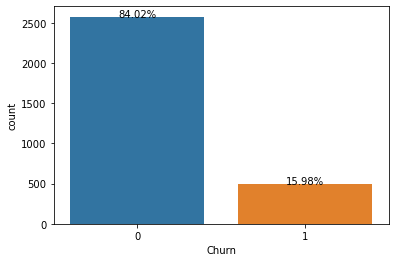

In [223]:
# Further Analysing Churn data through visualisation techniques

# creating the bar chart object
fig1, ax1 = plt.subplots(figsize=(6,4))

# creating the bar chart using seaborn
g = sns.countplot(x="Churn", ax=ax1, data=df)


for p in g.patches:
    g.annotate('{:.2f}%'.format(p.get_height()/df["Churn"].count()*100), 
               (p.get_x() + p.get_width() / 2., 
                p.get_height()), 
               ha = 'center')
    
plt.show()

# To save the bar chart as a png file use the below code
fig1.savefig(fname="countplot.png")

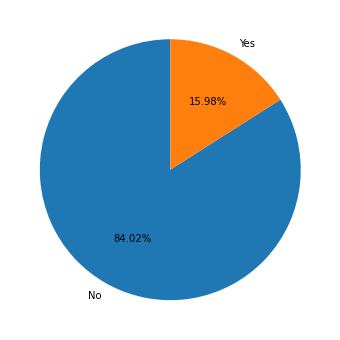

In [224]:
# Further Analysing Churn data through visualisation techniques

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No', 'Yes'
sizes = list(df['Churn'].value_counts())

# creating the pie chart object
fig2, ax2 = plt.subplots(figsize=(10, 6))

# creating the 
ax2.pie(sizes, 
        labels=labels,
        autopct='%1.2f%%',
        startangle=90)

plt.show()

# To save the pie chart as a png file use the below code
fig2.savefig(fname="churnpiechart.png")

#### 6. Model: Pre-processing

Encoding technique converts categorical data into numerical data

![Encode](pics/Encode.png)

In [225]:
# Converting categorical variables into dummy variables (one-hot encoding)

df = pd.get_dummies(data=df, drop_first=True)
df

,Gender,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Direct debit
0,1,0,0,49,103.70,5036.30,1,0,0,1
1,0,0,0,30,55.30,1530.60,0,0,0,1
2,1,0,0,1,20.20,20.20,0,0,0,1
3,1,0,0,1,45.25,45.25,0,0,0,1
4,0,0,0,11,97.85,1105.40,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3061,0,1,1,65,110.80,7245.90,0,0,1,0
3062,0,1,1,72,55.65,3880.05,0,0,1,0
3063,1,0,0,68,20.00,1396.00,0,0,1,0
3064,1,0,0,49,19.90,1022.60,0,0,1,0


In [226]:
# As you can see all the columns have been encoded 
# for logistic regression to work effectively all columns should be in numeric

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      3066 non-null   int64  
 1   Partner                     3066 non-null   int64  
 2   Dependents                  3066 non-null   int64  
 3   Tenure                      3066 non-null   int64  
 4   MonthlyCharges              3066 non-null   float64
 5   TotalCharges                3066 non-null   float64
 6   Churn                       3066 non-null   int64  
 7   Contract_One year           3066 non-null   uint8  
 8   Contract_Two year           3066 non-null   uint8  
 9   PaymentMethod_Direct debit  3066 non-null   uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 176.8 KB


#### 7. Model: Train/Test Split 

**Step1: Split dataset to X and Y variables**

In [227]:
# Separation of independent variables and dependent variable

x = df.loc[:, df.columns != "Churn"]
y = df.loc[:, df.columns == "Churn"]

In [228]:
# Exploring all independent variables

x.head()

,Gender,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Direct debit
0,1,0,0,49,103.70,5036.30,0,0,1
1,0,0,0,30,55.30,1530.60,0,0,1
2,1,0,0,1,20.20,20.20,0,0,1
3,1,0,0,1,45.25,45.25,0,0,1
4,0,0,0,11,97.85,1105.40,0,0,1


In [229]:
# Exploring the dependent variable

y.head()

,Churn
0,1
1,0
2,0
3,0
4,1


In [230]:
# Exploring the shape of x and y datasets - (no of rows, no of columns)

x.shape, y.shape

((3066, 9), (3066, 1))

**Step2: Performing 70:30 Data split**
- After Separating columns into dependent and independent variables (x, y), you split those into training-set and testing-set (70:30)


![split data](pics/traintestsplitdata1.png)

In [231]:
# Spliting data into train and test datasets --> 70:30 split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [232]:
# Exploring the dimensions of train datasets

x_train.shape, y_train.shape

((2146, 9), (2146, 1))

In [233]:
# Exploring the dimensions of test datasets

x_test.shape, y_test.shape

((920, 9), (920, 1))

#### 8. Model: Build (Train dataset)

In [234]:
# Using sklearn library to build a Logistic Regression Model
# from sklearn.linear_model import LogisticRegression --> this code imports the Logistic Regression module


# Create a linear regression model using LogisticRegression() module
model = LogisticRegression()

In [235]:
# fitting the training data (70%) to the Logistic regression model
# this will generate the intercept and all the coefficients

model.fit(x_train, y_train)

LogisticRegression()

#### 9. Model: Evaluation (Train dataset)

In [236]:
# Exploring the intercept

model.intercept_

array([-1.24081446])

In [237]:
# Exploring the coefficients

model.coef_

array([[-3.49139800e-01,  4.71515219e-01, -5.45298890e-01,
        -4.63549476e-02,  2.07123894e-02,  1.70523345e-04,
        -8.57749631e-01, -1.88484111e+00, -8.96116685e-02]])

In [238]:
# As you can see the above coefficients and intercept are very poorly formatted
# the below is much better representation of "intercept" in a dataframe layout

pd.DataFrame(np.array(model.intercept_), index=["Intercept"], columns=["Intercept"])

,Intercept
Intercept,-1.240814


In [239]:
# As you can see the above coefficients and intercept are very poorly formatted
# the below is much better representation of "intercept" in a dataframe layout

pd.DataFrame(np.array(model.coef_).T, index=x.columns, columns=["Coefficients"])

,Coefficients
Gender,-0.349140
Partner,0.471515
Dependents,-0.545299
Tenure,-0.046355
MonthlyCharges,0.020712
TotalCharges,0.000171
Contract_One year,-0.857750
Contract_Two year,-1.884841
PaymentMethod_Direct debit,-0.089612


#### 10. Model: Evaluation (Test dataset)

In [240]:
# Appling the logistic regression model to make prediction on testing dataset(30%)

y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [241]:
# The probability values of the predictions

y_pred_prob = model.predict_proba(x_test)[:, 1]
y_pred_prob

array([0.13089142, 0.34330737, 0.17532629, 0.43592402, 0.06543588,
       0.03236596, 0.34734385, 0.00881268, 0.31411107, 0.06728177,
       0.2441973 , 0.24842497, 0.0582678 , 0.03827686, 0.07478811,
       0.37578769, 0.12617244, 0.35136457, 0.00533425, 0.00732548,
       0.09189829, 0.04066913, 0.12982575, 0.2051919 , 0.07891107,
       0.00362037, 0.20572489, 0.00403962, 0.30784678, 0.09206618,
       0.03264355, 0.00438877, 0.03737152, 0.21456818, 0.62741165,
       0.03725809, 0.01210524, 0.08568701, 0.15834458, 0.00324336,
       0.02502045, 0.04592882, 0.43108661, 0.08640229, 0.05846212,
       0.38362663, 0.46201642, 0.24089147, 0.02156989, 0.01448048,
       0.03195778, 0.12443273, 0.26305591, 0.17897145, 0.08021906,
       0.00409149, 0.592636  , 0.01723121, 0.0065996 , 0.14209375,
       0.03589873, 0.00928275, 0.01019998, 0.01613314, 0.16740882,
       0.0297059 , 0.05525318, 0.25184078, 0.00782201, 0.0946465 ,
       0.30593711, 0.01283262, 0.04492342, 0.33731212, 0.40842

#### Evaluating the above predicted results using a Confusion Matrix  (model performance)

A confusion matrix is useful on evaluating the performance of a logistic regression model. A confusion matrix is a visual representation which tells us the degree of four important metrics:

- **True Positives (TP)**: The number of observations where the model predicted the customer would churn (Yes=1), and they actually do churn (Yes=1)

- **True Negatives (TN)**: The number of observations where the model predicted the customer would not churn (No=0), and they actually do not churn (No=0)

- **False Positives (FP)**: The number of observations where the model predicted the customer will churn (Yes=1), but in real life they do not churn (No=0)

- **False Negatives (FN)**: The number of observations where the model predicted the customer will not churn (No=0), but in real life they do churn (Yes=1).

In [242]:
# Create the confusion matrix
# from sklearn.metrics import confusion_matrix --> this code imports the confusion_matrix


# Pass actual test and predicted target test outcomes to function
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(750, 19, 122, 29)

In [243]:
# Create the confusion matrix (all values together)
cm = confusion_matrix(y_test, y_pred)
cm

array([[750,  19],
       [122,  29]], dtype=int64)

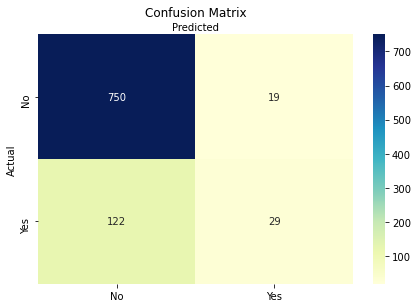

In [244]:
# Confusion matrix visualisation

# Create the visulaisation object
fig, ax = plt.subplots()


# Define x and y axis labels
class_names=["No","Yes"] # name  of classes
tick_marks = np.array([0.5,1.5])


# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# create the heatmap using seaborn library
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
plt.show()

#### Evaluating the above predicted results using a metrics
- Evaluating prediction using accuracy, precision, recall and roc/auc scores of the logistic regression model

In [245]:
# Evaluating prediction using accuracy, precision, recall and roc/auc scores of the logistic regression model

# using the above modules to calculate the accuacy score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob)

(0.8467391304347827,
 0.6041666666666666,
 0.19205298013245034,
 0.8068188668521087)

In [246]:
# Making the above calculations more presentable

print("Model Accuracy:{:.2f}%".format(accuracy_score(y_test, y_pred)))
print("Model Precision:{:.2f}%".format(precision_score(y_test, y_pred)))
print("Model Recall:{:.2f}%".format(recall_score(y_test, y_pred)))
print("Model ROC/AUC Score:{:.2f}%".format(roc_auc_score(y_test, y_pred_prob)))

Model Accuracy:0.85%
Model Precision:0.60%
Model Recall:0.19%
Model ROC/AUC Score:0.81%


In [247]:
# Creating ROC/AUC plot visualisation

from sklearn.metrics import roc_curve

# roc_curve module can be used to calculate the FPR (False Positive rate) and TPR (True Positive Rate)
# FPR and TPR are useful while drawing the ROC/AUC plot

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

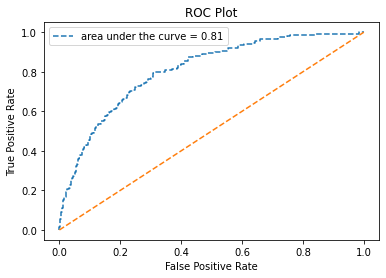

In [248]:
from sklearn.metrics import auc

auc1 = auc(fpr, tpr)
auc1

plt.plot(fpr, tpr, linestyle='--', label='area under the curve = {:.2f}'.format(auc1))
plt.plot([0, 1], [0, 1],linestyle='--')

# Title
plt.title('ROC Plot')

# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Show legend
plt.legend()

# Show plot
plt.show()

#### 13. Model: Predictions

In [249]:
# Predicting on new data

# Reading data from a Excel file and saving that data as a dataframe

dfp = pd.read_excel("Telco Customer Churn - Prediction Dataset.xlsx")

# Viewing records
dfp

,CustomerID,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,0193-ESZNN,Male,Yes,No,58,One year,Credit card,105.50,6205.50
1,0196-JTUNN,Female,No,No,9,Month-to-month,Credit card,75.20,633.85
2,1934-MKPNN,Male,Yes,Yes,33,One year,Credit card,20.10,620.55
3,1936-CZANN,Male,Yes,No,49,Two year,Credit card,49.65,2409.90
4,1936-UAFNN,Female,No,No,68,Two year,Credit card,110.25,7279.35
5,1937-OTUNN,Female,Yes,No,72,Two year,Direct debit,98.20,7015.90
6,1951-IEYNN,Male,Yes,Yes,72,Two year,Credit card,90.60,6441.85
7,1955-IBNNN,Female,No,No,59,Two year,Direct debit,20.20,1192.30
8,1965-DDBNN,Male,No,No,16,Month-to-month,Credit card,89.05,1448.60
9,1970-KKFNN,Female,No,No,35,Two year,Direct debit,23.30,797.10


In [250]:
# This method prints out information about a dataFrame including the index, dtype, columns, non-null values and memory usage
# This method is also useful for finding out missing values in a dataset
# if found, we can use interpolation techniques to rectify those missing values

dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      10 non-null     object 
 1   Gender          10 non-null     object 
 2   Partner         10 non-null     object 
 3   Dependents      10 non-null     object 
 4   Tenure          10 non-null     int64  
 5   Contract        10 non-null     object 
 6   PaymentMethod   10 non-null     object 
 7   MonthlyCharges  10 non-null     float64
 8   TotalCharges    10 non-null     float64
dtypes: float64(2), int64(1), object(6)
memory usage: 848.0+ bytes


In [251]:
# Removing "customerID" column
# this could done by pandas drop() function

dfp.drop(['CustomerID'], axis="columns", inplace=True)
dfp

,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,Yes,No,58,One year,Credit card,105.50,6205.50
1,Female,No,No,9,Month-to-month,Credit card,75.20,633.85
2,Male,Yes,Yes,33,One year,Credit card,20.10,620.55
3,Male,Yes,No,49,Two year,Credit card,49.65,2409.90
4,Female,No,No,68,Two year,Credit card,110.25,7279.35
5,Female,Yes,No,72,Two year,Direct debit,98.20,7015.90
6,Male,Yes,Yes,72,Two year,Credit card,90.60,6441.85
7,Female,No,No,59,Two year,Direct debit,20.20,1192.30
8,Male,No,No,16,Month-to-month,Credit card,89.05,1448.60
9,Female,No,No,35,Two year,Direct debit,23.30,797.10


In [252]:
# Replacing all columns containing categorical data (binominal - two categories) with one’s and zero’s. 
# this could done by pandas replace() function

dfp.Gender.replace({"Male":1, "Female":0}, inplace = True)
dfp.Partner.replace({"Yes":1, "No":0}, inplace = True)
dfp.Dependents.replace({"Yes":1, "No":0}, inplace = True)

dfp

,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges
0,1,1,0,58,One year,Credit card,105.50,6205.50
1,0,0,0,9,Month-to-month,Credit card,75.20,633.85
2,1,1,1,33,One year,Credit card,20.10,620.55
3,1,1,0,49,Two year,Credit card,49.65,2409.90
4,0,0,0,68,Two year,Credit card,110.25,7279.35
5,0,1,0,72,Two year,Direct debit,98.20,7015.90
6,1,1,1,72,Two year,Credit card,90.60,6441.85
7,0,0,0,59,Two year,Direct debit,20.20,1192.30
8,1,0,0,16,Month-to-month,Credit card,89.05,1448.60
9,0,0,0,35,Two year,Direct debit,23.30,797.10


In [253]:
# Convert categorical variable into dummy variables (one-hot encoding)

dfp2 = pd.get_dummies(data=dfp, drop_first=True)
dfp2.head()

,Gender,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Direct debit
0,1,1,0,58,105.50,6205.50,1,0,0
1,0,0,0,9,75.20,633.85,0,0,0
2,1,1,1,33,20.10,620.55,1,0,0
3,1,1,0,49,49.65,2409.90,0,1,0
4,0,0,0,68,110.25,7279.35,0,1,0


In [254]:
# Looking at the structure of the scaled Dataframe

dfp2.shape

(10, 9)

In [255]:
# Looking at the structure of the scaled Dataframe

dfp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      10 non-null     int64  
 1   Partner                     10 non-null     int64  
 2   Dependents                  10 non-null     int64  
 3   Tenure                      10 non-null     int64  
 4   MonthlyCharges              10 non-null     float64
 5   TotalCharges                10 non-null     float64
 6   Contract_One year           10 non-null     uint8  
 7   Contract_Two year           10 non-null     uint8  
 8   PaymentMethod_Direct debit  10 non-null     uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 638.0 bytes


In [256]:
# Making new predictions based on the "model" that was created in the earlier section

newchurninfo = model.predict(dfp2)
newchurninfo

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [257]:
# Converting the predicted results to a Dataframe ("dfr")

dfr = pd.DataFrame(newchurninfo, columns=["Churn"])
dfr

,Churn
0,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [258]:
# Replacing all one’s and zero’ in churn column to "Yes" & "No" labels 
# this could done by pandas replace() function

dfr.Churn.replace({1:"Yes", 0:"No"}, inplace = True)
dfr

,Churn
0,No
1,Yes
2,No
3,No
4,No
5,No
6,No
7,No
8,No
9,No


In [259]:
# Attaching predicted values to the original dataset

newdf = pd.DataFrame.join(dfp,dfr)
newdf

,Gender,Partner,Dependents,Tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,1,0,58,One year,Credit card,105.50,6205.50,No
1,0,0,0,9,Month-to-month,Credit card,75.20,633.85,Yes
2,1,1,1,33,One year,Credit card,20.10,620.55,No
3,1,1,0,49,Two year,Credit card,49.65,2409.90,No
4,0,0,0,68,Two year,Credit card,110.25,7279.35,No
5,0,1,0,72,Two year,Direct debit,98.20,7015.90,No
6,1,1,1,72,Two year,Credit card,90.60,6441.85,No
7,0,0,0,59,Two year,Direct debit,20.20,1192.30,No
8,1,0,0,16,Month-to-month,Credit card,89.05,1448.60,No
9,0,0,0,35,Two year,Direct debit,23.30,797.10,No


#### 14. Model: Save Predictions

In [260]:
# Save the dataframe as a CSV file
newdf.to_csv("NewChurnInfo.csv", header=True, index=False, encoding="utf-8")